In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
plt.style.use('seaborn')
df = pd.read_csv('kc_house_data.csv')

In [3]:
display(df.head())
display(df.tail())
display(df.sample(30))
display(df.info())
display(np.round(df.describe()))
df.shape

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
360,3211290370,6/5/2014,463000.0,3,2.50,1640,29970,2.0,0.0,0.0,...,7,1640,0.0,1992,0.0,98053,47.6359,-121.974,1580,28399
12190,3935900030,7/30/2014,775000.0,5,2.00,3540,9970,2.0,0.0,3.0,...,9,3540,0.0,1970,0.0,98125,47.7108,-122.277,2280,7195
389,2890100060,8/1/2014,385000.0,4,1.50,2040,10726,1.0,0.0,0.0,...,7,1380,660.0,1954,NaN,98177,47.7720,-122.358,1610,10020
14595,2887703186,10/23/2014,574800.0,3,1.50,1630,2946,1.5,0.0,0.0,...,8,1630,0.0,1932,NaN,98115,47.6865,-122.310,1550,3800
18118,9221400600,5/23/2014,462000.0,3,1.75,1300,2580,1.0,0.0,0.0,...,7,820,480.0,1919,0.0,98115,47.6740,-122.319,1180,2820
5184,3145600250,3/17/2015,190000.0,2,1.00,670,3101,1.0,0.0,0.0,...,6,670,0.0,1948,0.0,98118,47.5546,-122.274,1660,4100
9978,7853302190,12/17/2014,388500.0,4,2.50,1890,5395,2.0,0.0,0.0,...,7,1890,0.0,2006,NaN,98065,47.5415,-121.883,2060,5395
4322,2111010940,2/20/2015,289500.0,3,2.25,2120,3400,2.0,0.0,0.0,...,7,2120,0.0,2002,0.0,98092,47.3364,-122.170,2420,3400
7506,3298300210,2/19/2015,435000.0,3,1.00,940,7590,1.0,0.0,0.0,...,6,940,0.0,1959,NaN,98008,47.6231,-122.120,1250,7590
15530,1310430130,10/9/2014,459000.0,4,2.75,2790,6600,2.0,0.0,0.0,...,9,2790,0.0,2000,0.0,98058,47.4362,-122.109,2900,6752


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


None

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,19221.0,21534.0,21597.0,21597.0,21597.0,21597.0,17755.0,21597.0,21597.0,21597.0,21597.0,21597.0
mean,4.580474e+09,540297.0,3.0,2.0,2080.0,15099.0,1.0,0.0,0.0,3.0,8.0,1789.0,1971.0,84.0,98078.0,48.0,-122.0,1987.0,12758.0
std,2.876736e+09,367368.0,1.0,1.0,918.0,41413.0,1.0,0.0,1.0,1.0,1.0,828.0,29.0,400.0,54.0,0.0,0.0,685.0,27274.0
min,1.000102e+06,78000.0,1.0,0.0,370.0,520.0,1.0,0.0,0.0,1.0,3.0,370.0,1900.0,0.0,98001.0,47.0,-123.0,399.0,651.0
25%,2.123049e+09,322000.0,3.0,2.0,1430.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,1951.0,0.0,98033.0,47.0,-122.0,1490.0,5100.0
50%,3.904930e+09,450000.0,3.0,2.0,1910.0,7618.0,2.0,0.0,0.0,3.0,7.0,1560.0,1975.0,0.0,98065.0,48.0,-122.0,1840.0,7620.0
75%,7.308900e+09,645000.0,4.0,2.0,2550.0,10685.0,2.0,0.0,0.0,4.0,8.0,2210.0,1997.0,0.0,98118.0,48.0,-122.0,2360.0,10083.0
max,9.900000e+09,7700000.0,33.0,8.0,13540.0,1651359.0,4.0,1.0,4.0,5.0,13.0,9410.0,2015.0,2015.0,98199.0,48.0,-121.0,6210.0,871200.0


(21597, 21)

In [4]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
display(df.id.duplicated().any())
df.id.duplicated().sum()

True

177

In [6]:
duplicated_id = pd.concat(x for _, x in df.groupby('id') if len(x)>1)
df.id.drop_duplicates(keep='last', inplace = True)

In [7]:
display(df.id.duplicated().any())
df.id.duplicated().sum()

False

0

In [8]:
data = df.drop(['id'], axis = 1)
data.date = pd.to_datetime(data.date)

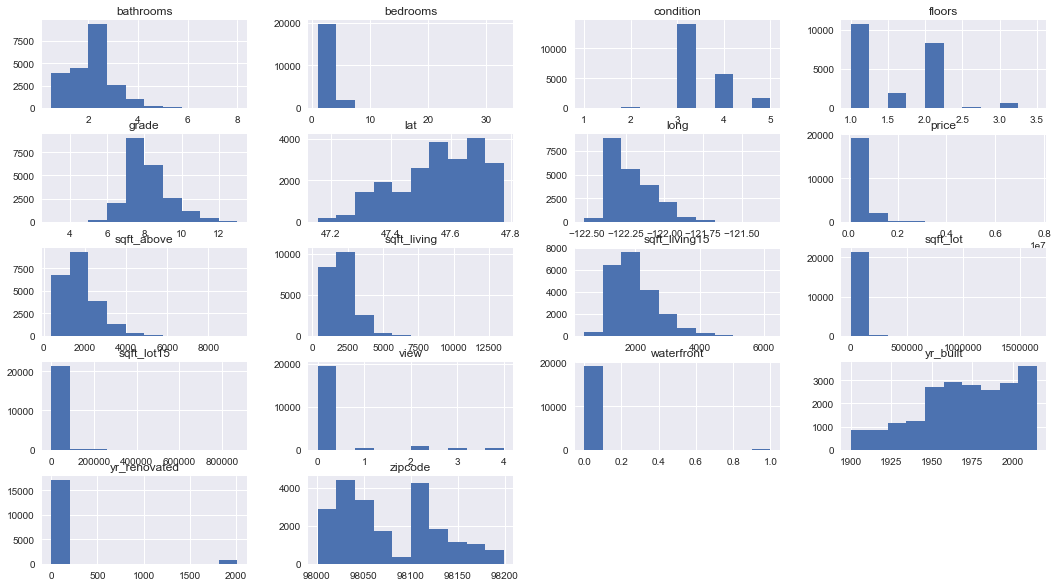

In [9]:
data.hist(figsize=(18,10));

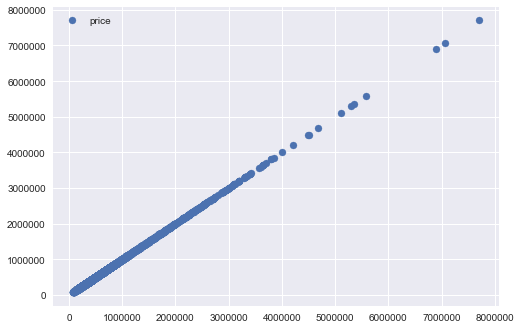

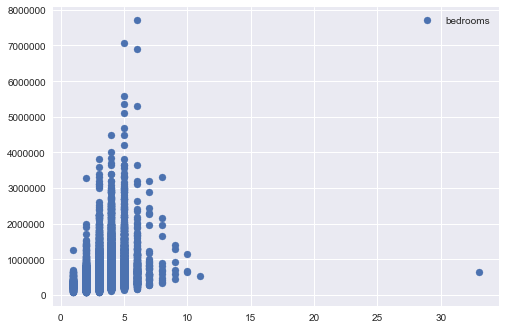

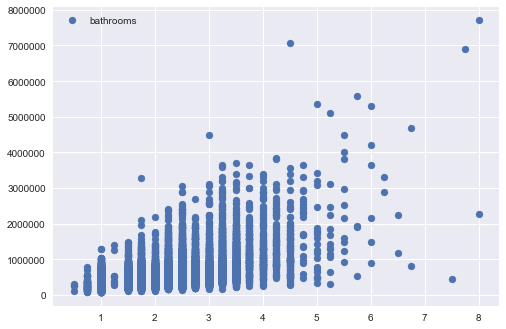

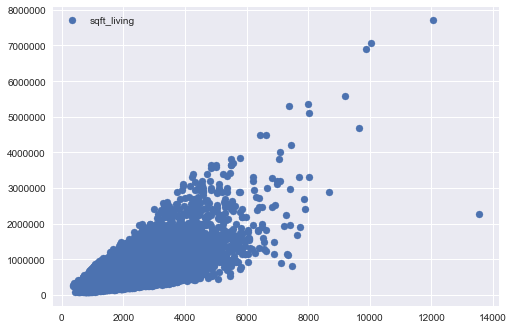

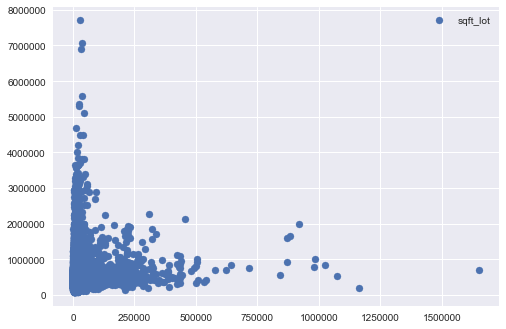

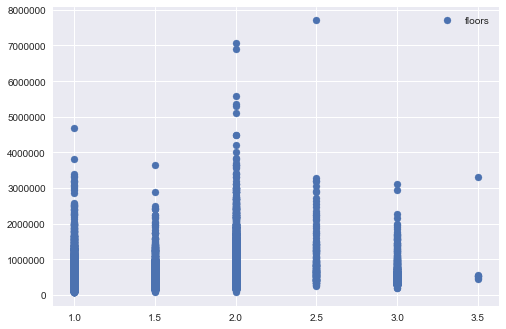

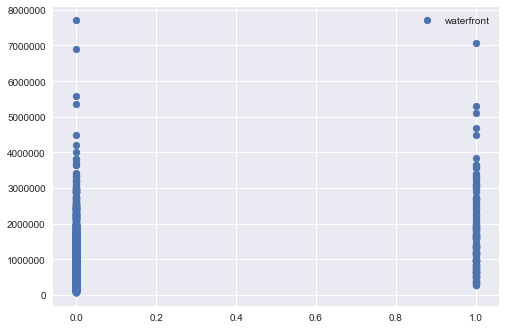

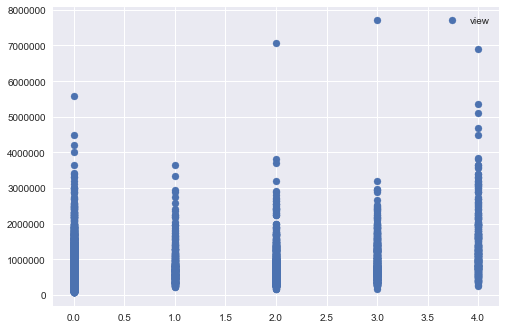

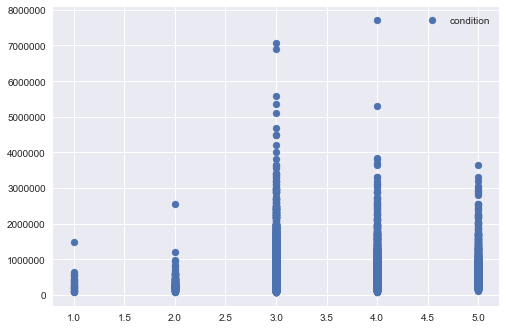

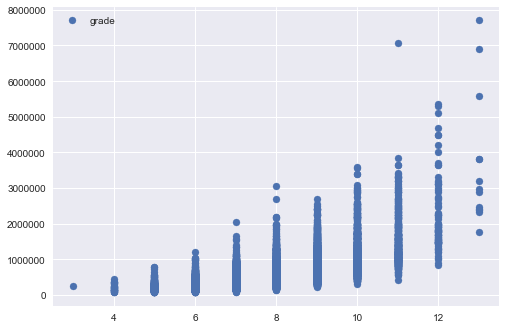

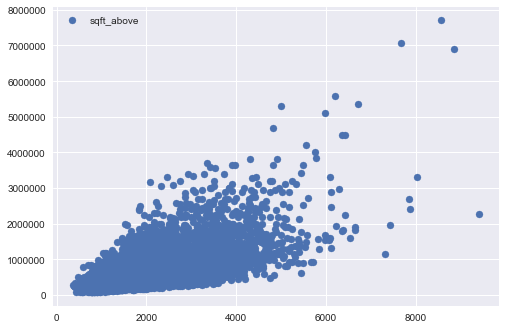

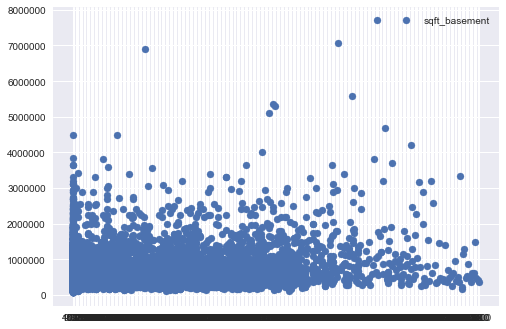

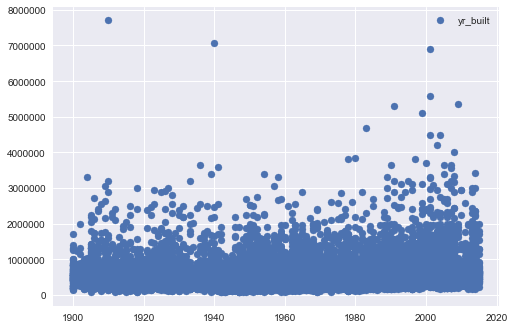

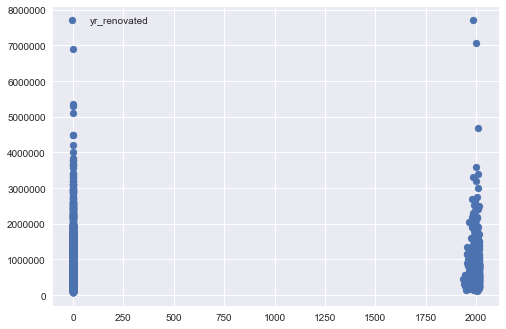

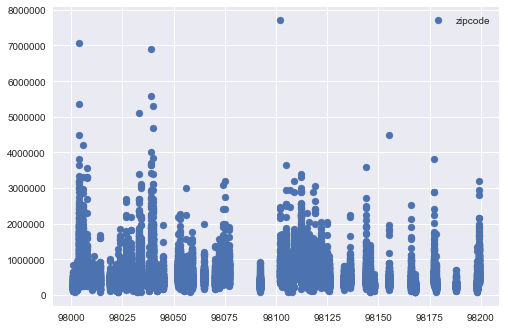

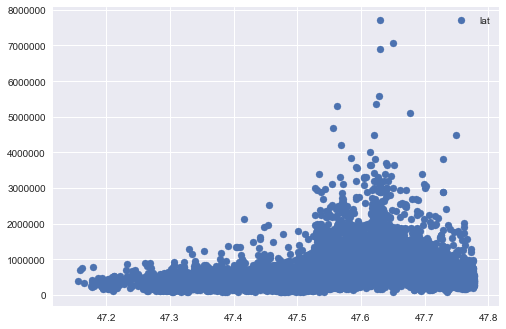

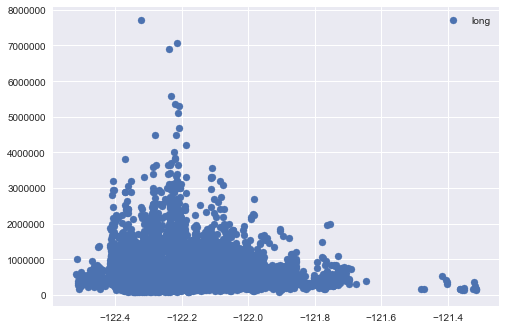

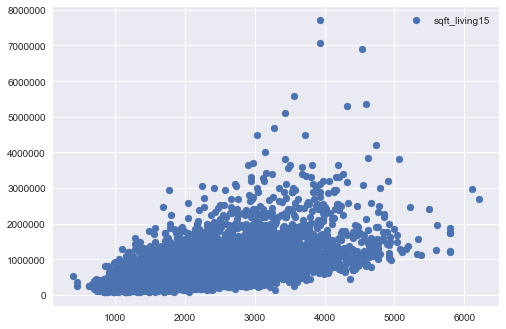

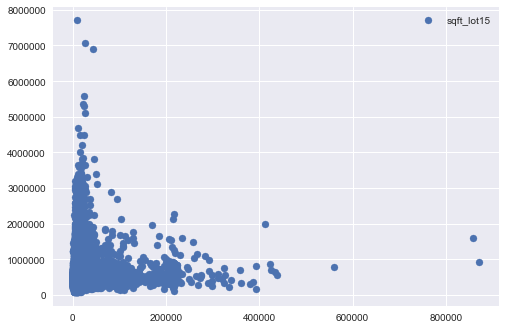

In [10]:
l_of_col = []
for column in data.columns[1:]:
    l_of_col.append(column)
for column in l_of_col:
    plt.scatter(data[column], data.price, label=column)
    plt.legend()
    plt.show()

In [11]:
display(data.sqft_basement.value_counts().head())
data.loc[data.sqft_basement == '?', ['sqft_living', 'sqft_above']]

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

,sqft_living,sqft_above
6,1715,1715
18,1200,1200
42,3595,3595
79,3450,3450
112,1540,1160
115,4380,2780
217,2250,2250
309,3320,2220
384,4800,3480
508,1540,820


In [12]:
data.sqft_basement.replace('?', value = abs(data.sqft_living - data.sqft_above), inplace = True)
data.sqft_basement = data.sqft_basement.astype('float64')
data.sqft_basement.value_counts()

0.0       13110
600.0       221
700.0       218
500.0       214
800.0       206
400.0       184
1000.0      149
900.0       144
300.0       142
200.0       108
530.0       107
480.0       106
750.0       105
450.0       103
720.0       102
620.0        91
580.0        85
840.0        85
420.0        81
860.0        80
1100.0       80
670.0        79
780.0        77
380.0        76
550.0        76
850.0        76
650.0        76
680.0        75
240.0        74
360.0        73
          ...  
2610.0        1
2600.0        1
283.0         1
2850.0        1
1245.0        1
2130.0        1
518.0         1
415.0         1
2180.0        1
243.0         1
1525.0        1
2620.0        1
1135.0        1
225.0         1
3000.0        1
2500.0        1
935.0         1
266.0         1
1920.0        1
1990.0        1
2590.0        1
1548.0        1
1930.0        1
588.0         1
915.0         1
2390.0        1
602.0         1
295.0         1
1281.0        1
906.0         1
Name: sqft_basement, Len

In [13]:
display(data.view.isnull().sum())
display(data.view.value_counts())
data.view.fillna(0, inplace=True)

63

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [14]:
print('yr_renovated null values')
display(data.yr_renovated.isnull().sum())
print('yr_renovated value counts')
display(data.yr_renovated.value_counts())
print('waterfront null values')
display(data.waterfront.isnull().sum())
print('waterfront value counts')
display(data.waterfront.value_counts())

yr_renovated null values


3842

yr_renovated value counts


0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

waterfront null values


2376

waterfront value counts


0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [15]:
data.yr_renovated.fillna(0, inplace=True)
data.waterfront.fillna(0, inplace=True)

In [16]:
data.yr_renovated = data.yr_renovated.astype(bool)
data.rename(columns={'yr_renovated':'renovated'}, inplace=True)
data.waterfront = data.waterfront.astype(bool)
data.sqft_basement = data.sqft_basement.astype(bool)
data.rename(columns={'sqft_basement':'basement'}, inplace=True)

In [17]:
data.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                 bool
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
basement                   bool
yr_built                  int64
renovated                  bool
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [19]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
# put data into separate variables
X = data.drop(['price', 'date'], axis=1)
y = data.price
# create statsmodels OLS and view summary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
model = sm.OLS(y_train, X_train.astype(float))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     8333.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        03:46:55   Log-Likelihood:            -2.2107e+05
No. Observations:               16197   AIC:                         4.422e+05
Df Residuals:                   16179   BIC:                         4.423e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -3.808e+04   2210.640    -17.224      0.000   -4.24e+04   -3.37e+04
bathrooms      4.224e+04   3861.649     10.939      0.000    3.47e+04    4.98e+04
sqft_living     158.0619      7.267     21.750      0.000     143.817     172.307
sqft_lot          0.1344      0.054      2.471      0.013       0.028       0.241
floors         4912.4062   4175.908      1.176      0.239   -3272.836    1.31e+04
waterfront     6.315e+05   2.12e+04     29.769      0.000     5.9e+05    6.73e+05
view           5.165e+04   2451.428     21.070      0.000    4.68e+04    5.65e+04
condition       2.79e+04   2733.804     10.206      0.000    2.25e+04    3.33e+04
grade           9.56e+04   2540.465     37.631      0.000    9.06e+04    1.01e+05
sqft_above       32.9990      8.027      4.111      0.000      17.265      48.733
basement      -4437.1079   6167.408     -0.719      0.472   -1.65e+04    7651.694
yr_built      -2632.6891     79.166    -33.255      0.000   -2787.864   -2477.514
renovated      4.812e+04   9294.350      5.178      0.000    2.99e+04    6.63e+04
zipcode        -529.7328     20.997    -25.230      0.000    -570.888    -488.577
lat            5.989e+05   1.26e+04     47.665      0.000    5.74e+05    6.24e+05
long          -2.289e+05   1.54e+04    -14.844      0.000   -2.59e+05   -1.99e+05
sqft_living15    17.4722      4.003      4.364      0.000       9.625      25.319
sqft_lot15       -0.4233      0.082     -5.164      0.000      -0.584      -0.263
==============================================================================
Omnibus:                    14406.174   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1657117.136
Skew:                           3.799   Prob(JB):                         0.00
Kurtosis:                      51.966   Cond. No.                     1.33e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

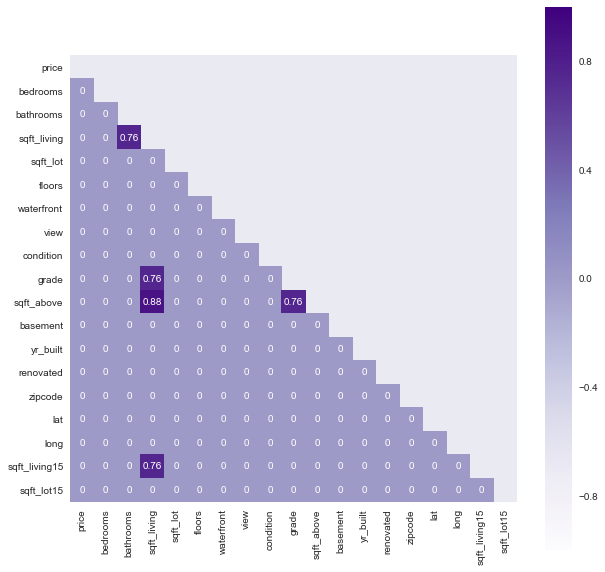

In [20]:
import seaborn as sns
plt.figure(figsize=(10, 10))
data_corr = data.corr()
data_corr[np.abs(data_corr)<.75] = 0
mask = np.zeros_like(data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data_corr, mask=mask, center=0, annot=True, cmap="Purples", square = True, vmin=-1)

In [22]:
data.drop('sqft_living', axis = 1, inplace = True)
import statsmodels.api as sm
# put data into separate variables
X = data.drop(['price', 'date'], axis=1)
y = data.price
# create statsmodels OLS and view summary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
model = sm.OLS(y_train, X_train.astype(float))
results = model.fit()
results.summary()

KeyError: "['sqft_living'] not found in axis"

In [ ]:
#feat_cont = data.drop(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'renovated', 'basement', 'condition', 'zipcode', 'date', 'yr_built', 'grade'], axis=1)
#feat_cat = data.drop(feat_cont.columns, axis=1)
#feat_cont.hist(figsize=(10,12));

In [ ]:
#from sklearn import preprocessing
# normalize and scale data with power transform
#pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True)
#data1 = pt.fit_transform(feat_cont)
#data1 = pd.DataFrame(data1, columns=feat_cont.columns)
#data1.hist(figsize=(10,12));

In [ ]:
#from scipy import stats

#for feat in data1:
#    stats.kstest(feat, "norm")

In [ ]:
#all_feat = pd.concat([data1.drop('price', axis=1), feat_cat, data1.price], axis=1)
# put data into separate variables
#X2 = all_feat.drop(['price', 'date'], axis=1)
#y2 = all_feat.price
# create statsmodels OLS and view summary
#ols = sm.OLS(y2, X2.astype(float))
#results = ols.fit()
#results.summary()

In [44]:
X = data.drop(['price', 'date'], axis=1)
y = data.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=1)
model = sm.OLS(y_train, X_train.astype(float))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     6915.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        03:58:42   Log-Likelihood:            -1.7689e+05
No. Observations:               12958   AIC:                         3.538e+05
Df Residuals:                   12941   BIC:                         3.539e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -2.713e+04   2400.644    -11.301      0.000   -3.18e+04   -2.24e+04
bathrooms      5.375e+04   4250.550     12.646      0.000    4.54e+04    6.21e+04
sqft_lot          0.1510      0.058      2.612      0.009       0.038       0.264
floors        -1.344e+04   4597.735     -2.923      0.003   -2.25e+04   -4428.447
waterfront     6.251e+05   2.41e+04     25.913      0.000    5.78e+05    6.72e+05
view           5.708e+04   2731.481     20.898      0.000    5.17e+04    6.24e+04
condition      2.961e+04   3051.739      9.703      0.000    2.36e+04    3.56e+04
grade          1.017e+05   2838.185     35.830      0.000    9.61e+04    1.07e+05
sqft_above      176.4841      4.981     35.434      0.000     166.721     186.247
basement       9.271e+04   4888.578     18.964      0.000    8.31e+04    1.02e+05
yr_built      -2679.1821     88.763    -30.184      0.000   -2853.171   -2505.193
renovated       5.02e+04   1.03e+04      4.881      0.000       3e+04    7.04e+04
zipcode        -534.5023     23.533    -22.713      0.000    -580.630    -488.374
lat            5.971e+05   1.41e+04     42.423      0.000     5.7e+05    6.25e+05
long          -2.335e+05   1.73e+04    -13.531      0.000   -2.67e+05      -2e+05
sqft_living15    25.3124      4.458      5.678      0.000      16.575      34.050
sqft_lot15       -0.3618      0.091     -3.988      0.000      -0.540      -0.184
==============================================================================
Omnibus:                    11704.295   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1327177.190
Skew:                           3.903   Prob(JB):                         0.00
Kurtosis:                      51.961   Cond. No.                     1.35e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""